Chapter 12

# 支持向量机，核技巧
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import svm, datasets
from matplotlib import cm

In [4]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [5]:
# Generate data

X, y = make_classification(n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=1, 
                           n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable,
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1)]

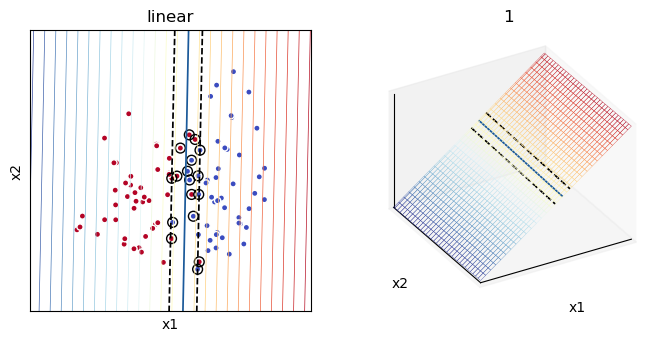

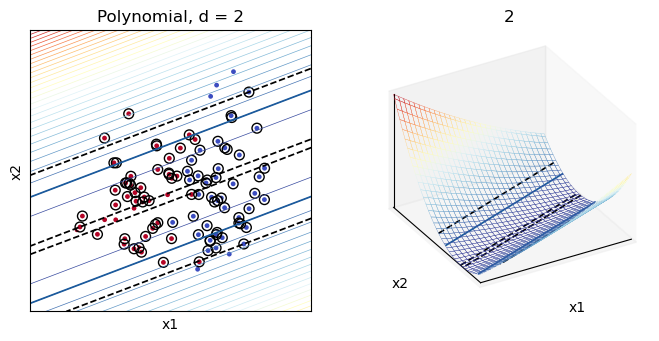

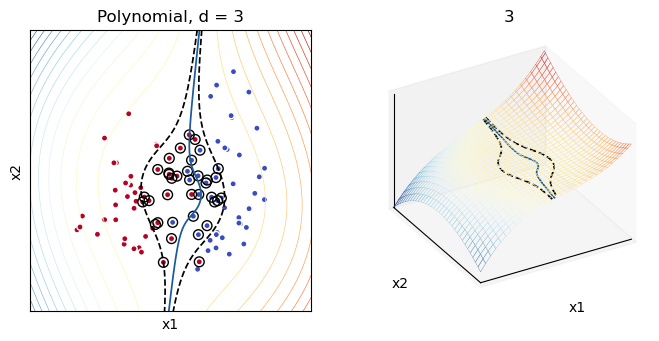

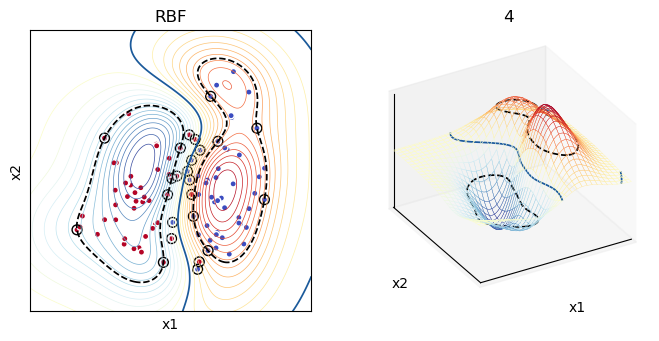

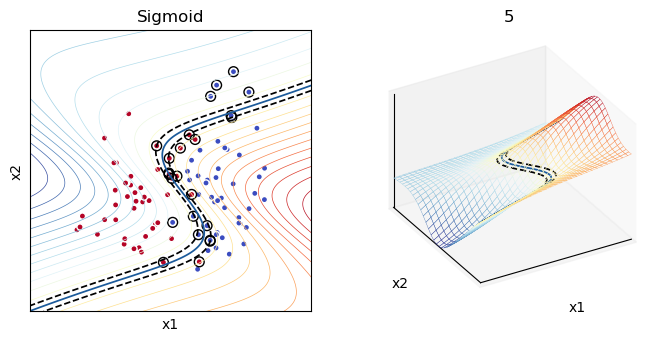

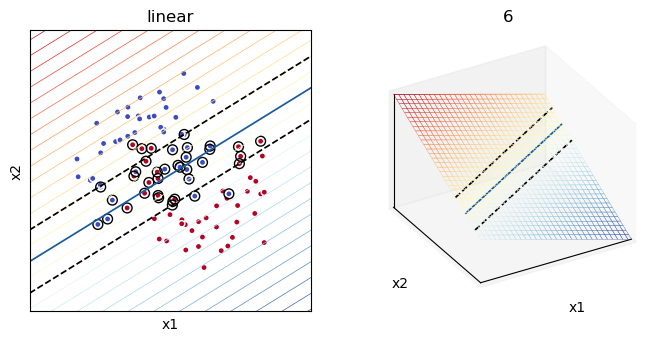

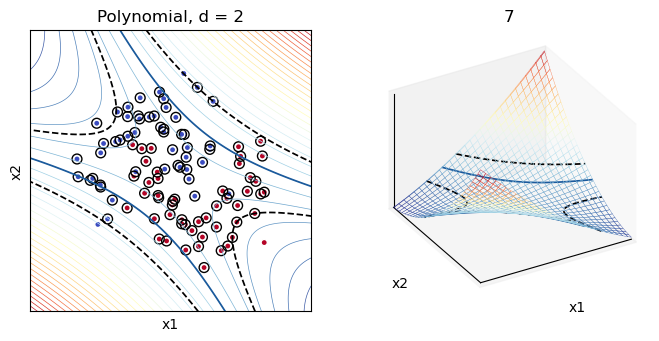

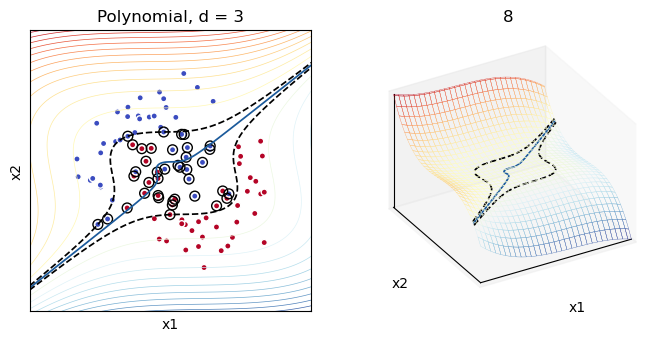

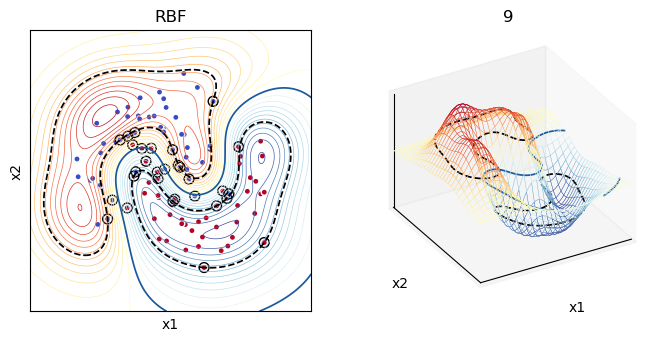

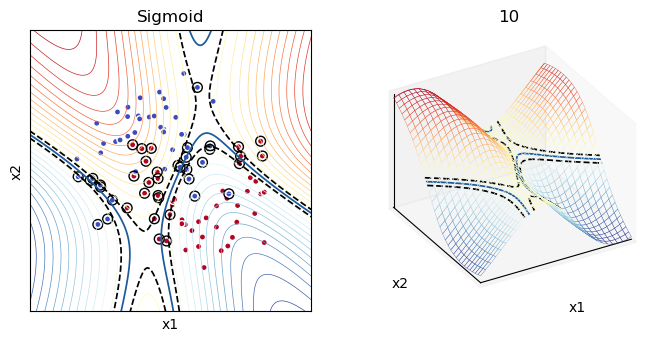

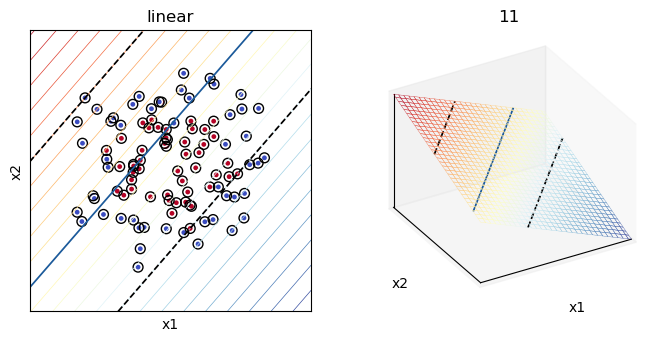

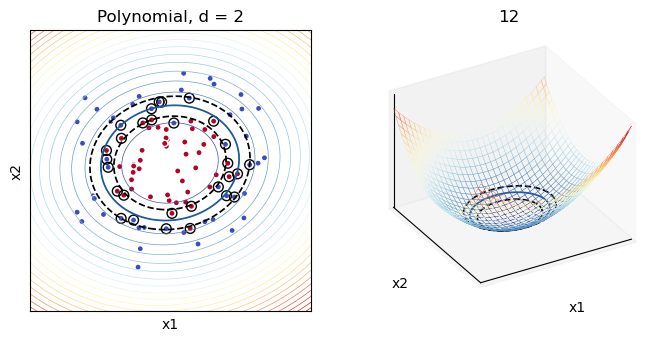

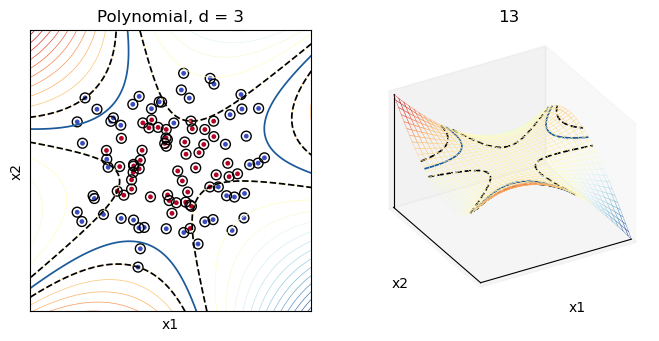

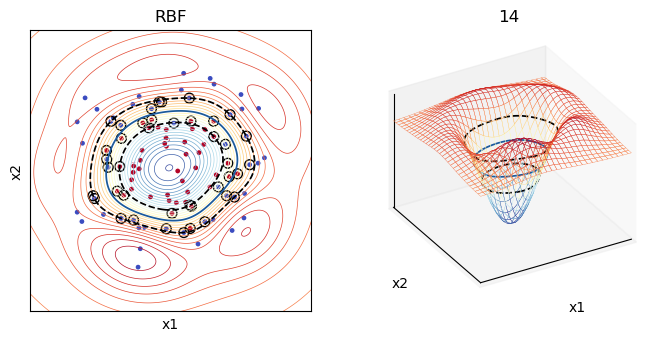

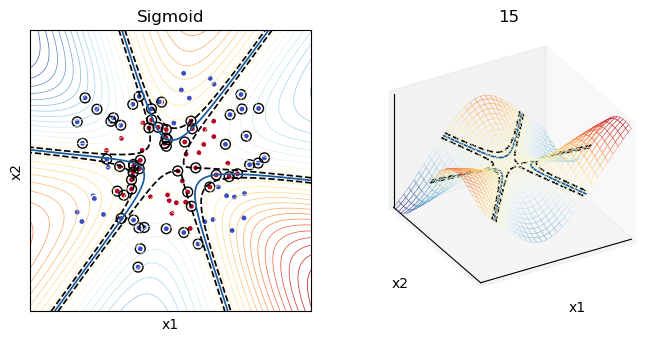

In [25]:
#%% iterate over datasets

fig_name = 1

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)

    C = 3  # SVM regularization parameter

    models = (svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
              svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='sigmoid', gamma=0.5, C=C))

    models = (clf.fit(X, y) for clf in models)
    
    # title for the plots
    titles = ('linear',
              'Polynomial, d = 2',
              'Polynomial, d = 3',
              'RBF',
              'Sigmoid')

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    # iterate over models
    for clf, title in zip(models, titles):
        
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        Z_0 = clf.decision_function(X);
        
        fig = plt.figure(figsize = (8,4))
        ax = fig.add_subplot(1,2,1)
        
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='w')

        x1_sp_vec = clf.support_vectors_[:, 0];
        x2_sp_vec = clf.support_vectors_[:, 1];
        
        plt.scatter(x1_sp_vec, x2_sp_vec, s=50,
                    facecolors='none', edgecolors='k')
        plt.contour(xx, yy, -Z, levels = 30, cmap=plt.cm.RdYlBu_r,linewidths = 0.5)
        plt.contour(xx, yy, -Z, [0], alpha = 1, colors='#1B5A9C',linewidths = 1.25)
        plt.contour(xx, yy, -Z, [-1,1], alpha = 1, colors='k',linewidths = 1.25,linestyles = '--')

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        # ax.set_xticks(np.linspace(xx.min(), xx.max(), 5))
        # ax.set_yticks(np.linspace(yy.min(), yy.max(), 5))
        ax.set_xticks([])
        ax.set_yticks([])        
        ax.set_title(title)
        # plt.tight_layout()
        # plt.axis('square')
        # ax.set_aspect('equal', adjustable='box')
        ax.set_box_aspect(1)
        # ax.set_aspect('equal', 'box')
        # plt.gcf().set_size_inches((3.5,3.5))
        # ax.set_xlim(xx.min(), xx.max())
        # ax.set_ylim(yy.min(), yy.max())
        
        ax = fig.add_subplot(1,2,2, projection='3d')
        norm = plt.Normalize(-Z.max(),-Z.min())
        colors = cm.RdYlBu_r(norm(-Z))
        
        surf = ax.plot_surface(xx, yy, -Z,linewidths = 0.25,
                               facecolors=colors, shade=False,rstride=10,cstride=10)
        surf.set_facecolor((0,0,0,0))

        ax.contour(xx, yy, -Z, [0], colors='#1B5A9C',linewidths = 1.25)
        ax.contour(xx, yy, -Z, [-1,1], colors='k',linewidths = 1.25,linestyles = '--')

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        
        ax.set_proj_type('ortho')
        ax.view_init(azim=-120, elev=30) 
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        # ax.set_box_aspect(aspect = (1,1,1))

        # plt.tight_layout()
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        # ax.set_xticks(np.linspace(xx.min(), xx.max(), 5))
        # ax.set_yticks(np.linspace(yy.min(), yy.max(), 5))
        # ax.set_zticks(np.linspace(-Z.max(), -Z.min(), 5))
        # ax.set_proj_type('ortho')
        ax.set_title(str(fig_name))
        
        plt.savefig(str(fig_name) + '.svg')
        
        fig_name = fig_name + 1